# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [204]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("creditcard.csv")

In [205]:
df.shape

(284807, 31)

In [206]:
df = df.drop(["Amount","Time"],axis =1)

In [207]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [208]:
df[["V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]] = df[["V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]].apply(lambda x: x.fillna(x.mean(),axis = 0))
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [209]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [210]:
df["Class"].value_counts()      # df[class] is highly imbalance
                                # no. of frauds = 492

0    284315
1       492
Name: Class, dtype: int64

In [211]:
df.corr()["Class"] # Mostly columns have negative value of correlation with "Class".Like "time". 

V1      -0.101347
V2       0.091289
V3      -0.192961
V4       0.133447
V5      -0.094974
V6      -0.043643
V7      -0.187257
V8       0.019875
V9      -0.097733
V10     -0.216883
V11      0.154876
V12     -0.260593
V13     -0.004570
V14     -0.302544
V15     -0.004223
V16     -0.196539
V17     -0.326481
V18     -0.111485
V19      0.034783
V20      0.020090
V21      0.040413
V22      0.000805
V23     -0.002685
V24     -0.007221
V25      0.003308
V26      0.004455
V27      0.017580
V28      0.009536
Class    1.000000
Name: Class, dtype: float64

In [212]:
fraud_data = df[df['Class']==1.]
non_fraud_data = df[df["Class"]==0.]
print(fraud_data.shape)
print(non_fraud_data.shape)

(492, 29)
(284315, 29)


In [213]:
non_fraud_data1 = non_fraud_data.sample(fraud_data.shape[0])

In [214]:
fraud_data.shape,non_fraud_data1.shape    #### Now both having same shape


((492, 29), (492, 29))

In [215]:
import numpy as np
final_data = fraud_data.append(non_fraud_data1,ignore_index=True)


In [216]:
x_train=final_data.drop("Class",axis=1)
y_labels=final_data["Class"]
x_train=np.array(x_train)
y_labels = np.array(y_labels)

In [217]:
x_train.shape,y_labels.shape

((984, 28), (984,))

In [218]:
### Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5
ratio_val = 0.2
ratio_test = 0.3

# Produces test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(x_train, y_labels, test_size=ratio_test, random_state =2)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [219]:
### Normalizing the  Data
mean = X_train.mean(axis = 0)
X_train = X_train- mean
std = X_train.std(axis =0) + 0.000000001                          
X_train /= std           # normalizing train data   

x_test -= mean          # normalizing test data
x_test /= std

X_val -= mean            # normalizing validation data
X_val /= std

In [220]:
print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)


(491, 28)
(491,)
(296, 28)
(296,)
(197, 28)
(197,)


In [221]:
#5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with 
#activation function relu/tanh (check by experiment).

#6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

#7.Train the Model with Epochs (100).

import tensorflow as tf


def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1], )),
    
    tf.keras.layers.Dense(8, activation='relu'),
    
    tf.keras.layers.Dense(6, activation='relu'),
    
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  optimizer = tf.keras.optimizers

  model.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
  return model

In [222]:

### 6.Train the Model with Epochs (100).
all_scores =[]
all_mae_histories = []

num_epochs =20

model = build_model()
history =model.fit(X_train, y_train, validation_data=(X_val,y_val),
epochs=num_epochs, batch_size=16, verbose=1)


Epoch 1/20
31/31 [==============================] - 1s 9ms/step - loss: 0.6697 - accuracy: 0.6374 - val_loss: 0.6386 - val_accuracy: 0.7614
Epoch 2/20
31/31 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.8299 - val_loss: 0.5882 - val_accuracy: 0.8376
Epoch 3/20
31/31 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.8415 - val_loss: 0.5293 - val_accuracy: 0.8579
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.8871 - val_loss: 0.4671 - val_accuracy: 0.8629
Epoch 5/20
31/31 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.8667 - val_loss: 0.4085 - val_accuracy: 0.8680
Epoch 6/20
31/31 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8663 - val_loss: 0.3587 - val_accuracy: 0.9036
Epoch 7/20
31/31 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8980 - val_loss: 0.3191 - val_accuracy: 0.9086
Epoch 8/20
31/31 [==

In [228]:

hist_dic =history.history
hist_dic.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

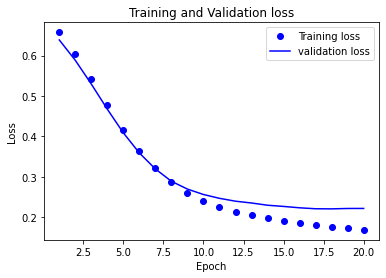

In [224]:
import matplotlib.pyplot as plt
loss_values = hist_dic["loss"]
val_loss_values = hist_dic["val_loss"]
acc = hist_dic["accuracy"]
epochs = range(1,len(acc)+1)

plt.plot(epochs, loss_values,'bo',label = 'Training loss')
plt.plot(epochs, val_loss_values,'b',label = 'validation loss')


plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [229]:
result = model.evaluate(x_test,y_test)
result

10/10 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9358


[0.20947277545928955, 0.9358108043670654]

Observation:
with epoch =100 the model was overfitting at epoch number 20.
so i changed the epoch from 100 to 20.
And i got accuracy 94 %.

In [232]:
predict = model.predict(x_test)
predict[1]

array([0.16499254], dtype=float32)

In [233]:
y_test[1]

0

In [234]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
